In [1]:
#ANN 11

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
def build_model(dropout_rate=0.3, weight_decay=1e-4):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
model = build_model(dropout_rate=0.3)
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)


C:\Users\Avina\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 495ms/step - accuracy: 0.4073 - loss: 1.7848 - val_accuracy: 0.5029 - val_loss: 1.4795
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 318s 508ms/step - accuracy: 0.6195 - loss: 1.0765 - val_accuracy: 0.6637 - val_loss: 0.9773
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 495ms/step - accuracy: 0.6903 - loss: 0.8894 - val_accuracy: 0.7091 - val_loss: 0.8536
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 315s 504ms/step - accuracy: 0.7295 - loss: 0.7733 - val_accuracy: 0.7084 - val_loss: 0.8602
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 347s 555ms/step - accuracy: 0.7589 - loss: 0.6931 - val_accuracy: 0.7358 - val_loss: 0.7569


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.6999 - loss: 0.1777
Accuracy: 0.6973999738693237


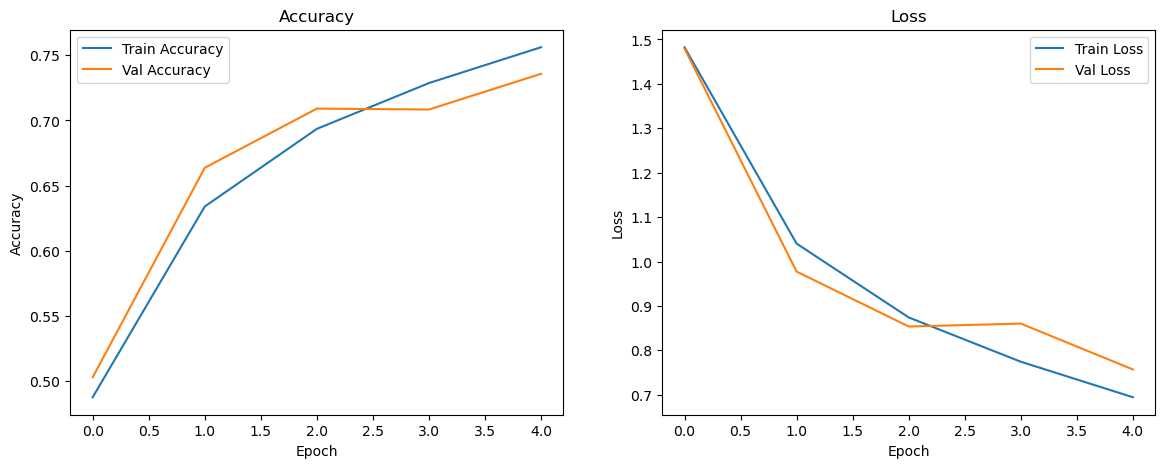

In [21]:
# Plot training history
def plot_metrics(history, title_suffix=''):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)